In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, cast

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Inspect the data for measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Inspect the data for station
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [13]:
# Calculate the date one year in the past
past_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
past_date

datetime.date(2016, 8, 23)

In [14]:
# Query the date and measurement data 
year_data = session.query(Measurement.date, Measurement.prcp)\
            .filter(Measurement.date >= past_date).all()
year_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(year_data, columns = ["Date", "Precipitation"])
year_df = year_df.set_index(['Date'])

# Sort the dataframe by date
year_df = year_df.sort_values(by = 'Date')

In [16]:
year_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


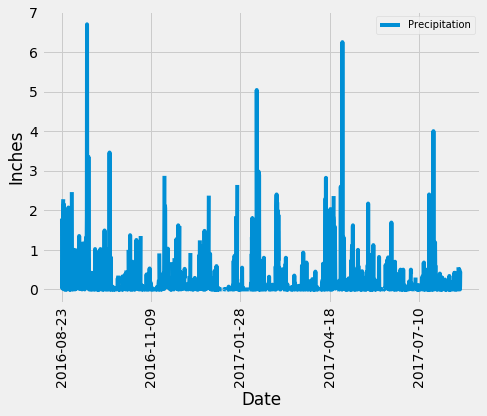

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot.line(y='Precipitation', rot=90, figsize=(7,5))

plt.legend(loc='upper right', fontsize=10)
plt.ylabel("Inches")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(year_df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(Measurement).group_by(Measurement.station).count() 
station_num

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_totals = func.count(Measurement.station)

session.query(Measurement.station, station_totals).group_by(Measurement.station).order_by(station_totals.desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'

# Find data for the most active station
active_station = session.query(Measurement.prcp).filter(Measurement.station == station_id)

# Find average of data for the most active station
avg = session.query(func.avg(Measurement.prcp)).filter(Measurement.station == station_id).all()

print(f"The highest temperature at station USC00519281 was {max(active_station)[0]}")
print(f"The lowestest temperature at station USC00519281 was {min(active_station)[0]}")
print(f"The average temperature at station USC00519281 is {round(avg[0][0],2)}")


The highest temperature at station USC00519281 was 9.64
The lowestest temperature at station USC00519281 was 0.0
The average temperature at station USC00519281 is 0.21


In [22]:
# Find year's data for temperature for active station
year_temp_data = session.query(Measurement.date, Measurement.tobs)\
            .filter(Measurement.date >= past_date).filter(Measurement.station == station_id).all()

In [23]:
# Create dataframe
year_df_temp = pd.DataFrame(year_temp_data, columns = ["Date", "Temperature"])
year_df_temp = year_df_temp.set_index(['Date'])
year_df_temp

,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


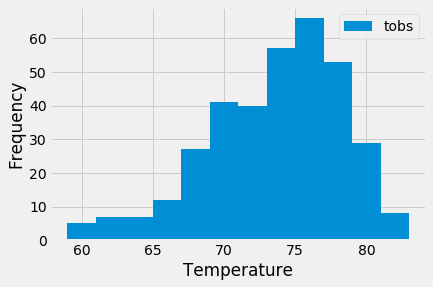

In [24]:
# Plot histogram
x = year_df_temp['Temperature']
plt.hist(x, bins=12, label='tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

# Close session

In [25]:
# Close Session
session.close()